In [1]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt

## Ivanov

https://arxiv.org/pdf/2112.04515

NGC-only z3 samples, fit using:
* the (window-free) redshift-space power spectrum P` up to kmax = 0.2h Mpc−1
* the above plus the real-space power spectrum proxy Q0 (green) up to kmax = 0.4h Mpc−1
* the above plus the bispectrum monopole B0 up to
kmax = 0.08h Mpc−1

In [2]:
dir_path = '/anvil/scratch/x-mho1/cmass-ili/literature/ivanov/cmass_pqb_0'

In [3]:
names = pd.read_csv(
    join(dir_path, '2024-12-19_5000_.paramnames'), delimiter='\t', header=None)
names.columns = ['name', 'latex']
names

,name,latex
0,omega_b,10^{-2}\omega{}_{b }
1,omega_cdm,\omega{}_{cdm }
2,h,h
3,ln10^{10}A_s,ln10^{10}A_{s }
4,n_s,n_{s }
5,b^{(1)}_1,b^{(1)}_{1 }
6,b^{(1)}_2,b^{(1)}_{2 }
7,b^{(1)}_{G_2},b^{(1)}_{{G 2} }
8,Omega_m,\Omega{}_{m }
9,H0,H0


In [4]:
import pandas as pd
import glob
import os

pattern = join(dir_path, '2024-12-19_5000__*.txt')

files = glob.glob(pattern)
dfs = []

burn_in = 500
thinning = 50

for file in files:
    df = pd.read_csv(file, header=None, delimiter='\t')
    df = df.drop(df.columns[[0, -1]], axis=1)
    df.columns = names['name']
    df = df.iloc[burn_in::thinning]
    df['chain'] = os.path.basename(file)
    dfs.append(df)

samples = pd.concat(dfs, ignore_index=True)

samples

name,omega_b,omega_cdm,h,ln10^{10}A_s,n_s,b^{(1)}_1,b^{(1)}_2,b^{(1)}_{G_2},Omega_m,H0,sigma8,chain
0,2.256921,0.124185,0.672097,2.398391,1.052404,2.869535,0.872783,0.017265,0.326309,67.20967,0.619421,2024-12-19_5000__56.txt
1,2.275031,0.160698,0.707421,2.134394,0.891898,3.020902,1.176274,0.148684,0.367858,70.74213,0.600905,2024-12-19_5000__56.txt
2,2.322281,0.139624,0.710906,2.303971,0.871478,2.753303,1.824395,-0.028899,0.323497,71.09059,0.596487,2024-12-19_5000__56.txt
3,2.206978,0.146894,0.684184,2.372667,0.890990,2.659792,2.023143,-0.066496,0.362327,68.41838,0.640596,2024-12-19_5000__56.txt
4,2.258862,0.124378,0.712115,2.573834,1.104797,2.642326,1.038835,0.068236,0.291084,71.21154,0.703013,2024-12-19_5000__56.txt
...,...,...,...,...,...,...,...,...,...,...,...,...
4746,2.250984,0.125803,0.685660,2.650553,1.039545,2.500826,1.669667,-0.005137,0.316843,68.56599,0.709020,2024-12-19_5000__3.txt
4747,2.282406,0.123817,0.695522,2.726231,1.059588,2.402539,1.390929,0.020499,0.304465,69.55217,0.735897,2024-12-19_5000__3.txt
4748,2.324698,0.139456,0.690500,2.570474,0.944009,2.511362,1.115603,0.126115,0.342598,69.04999,0.696069,2024-12-19_5000__3.txt
4749,2.272000,0.124991,0.688856,2.615694,1.060362,2.581462,-0.171055,-0.420704,0.312640,68.88558,0.699524,2024-12-19_5000__3.txt


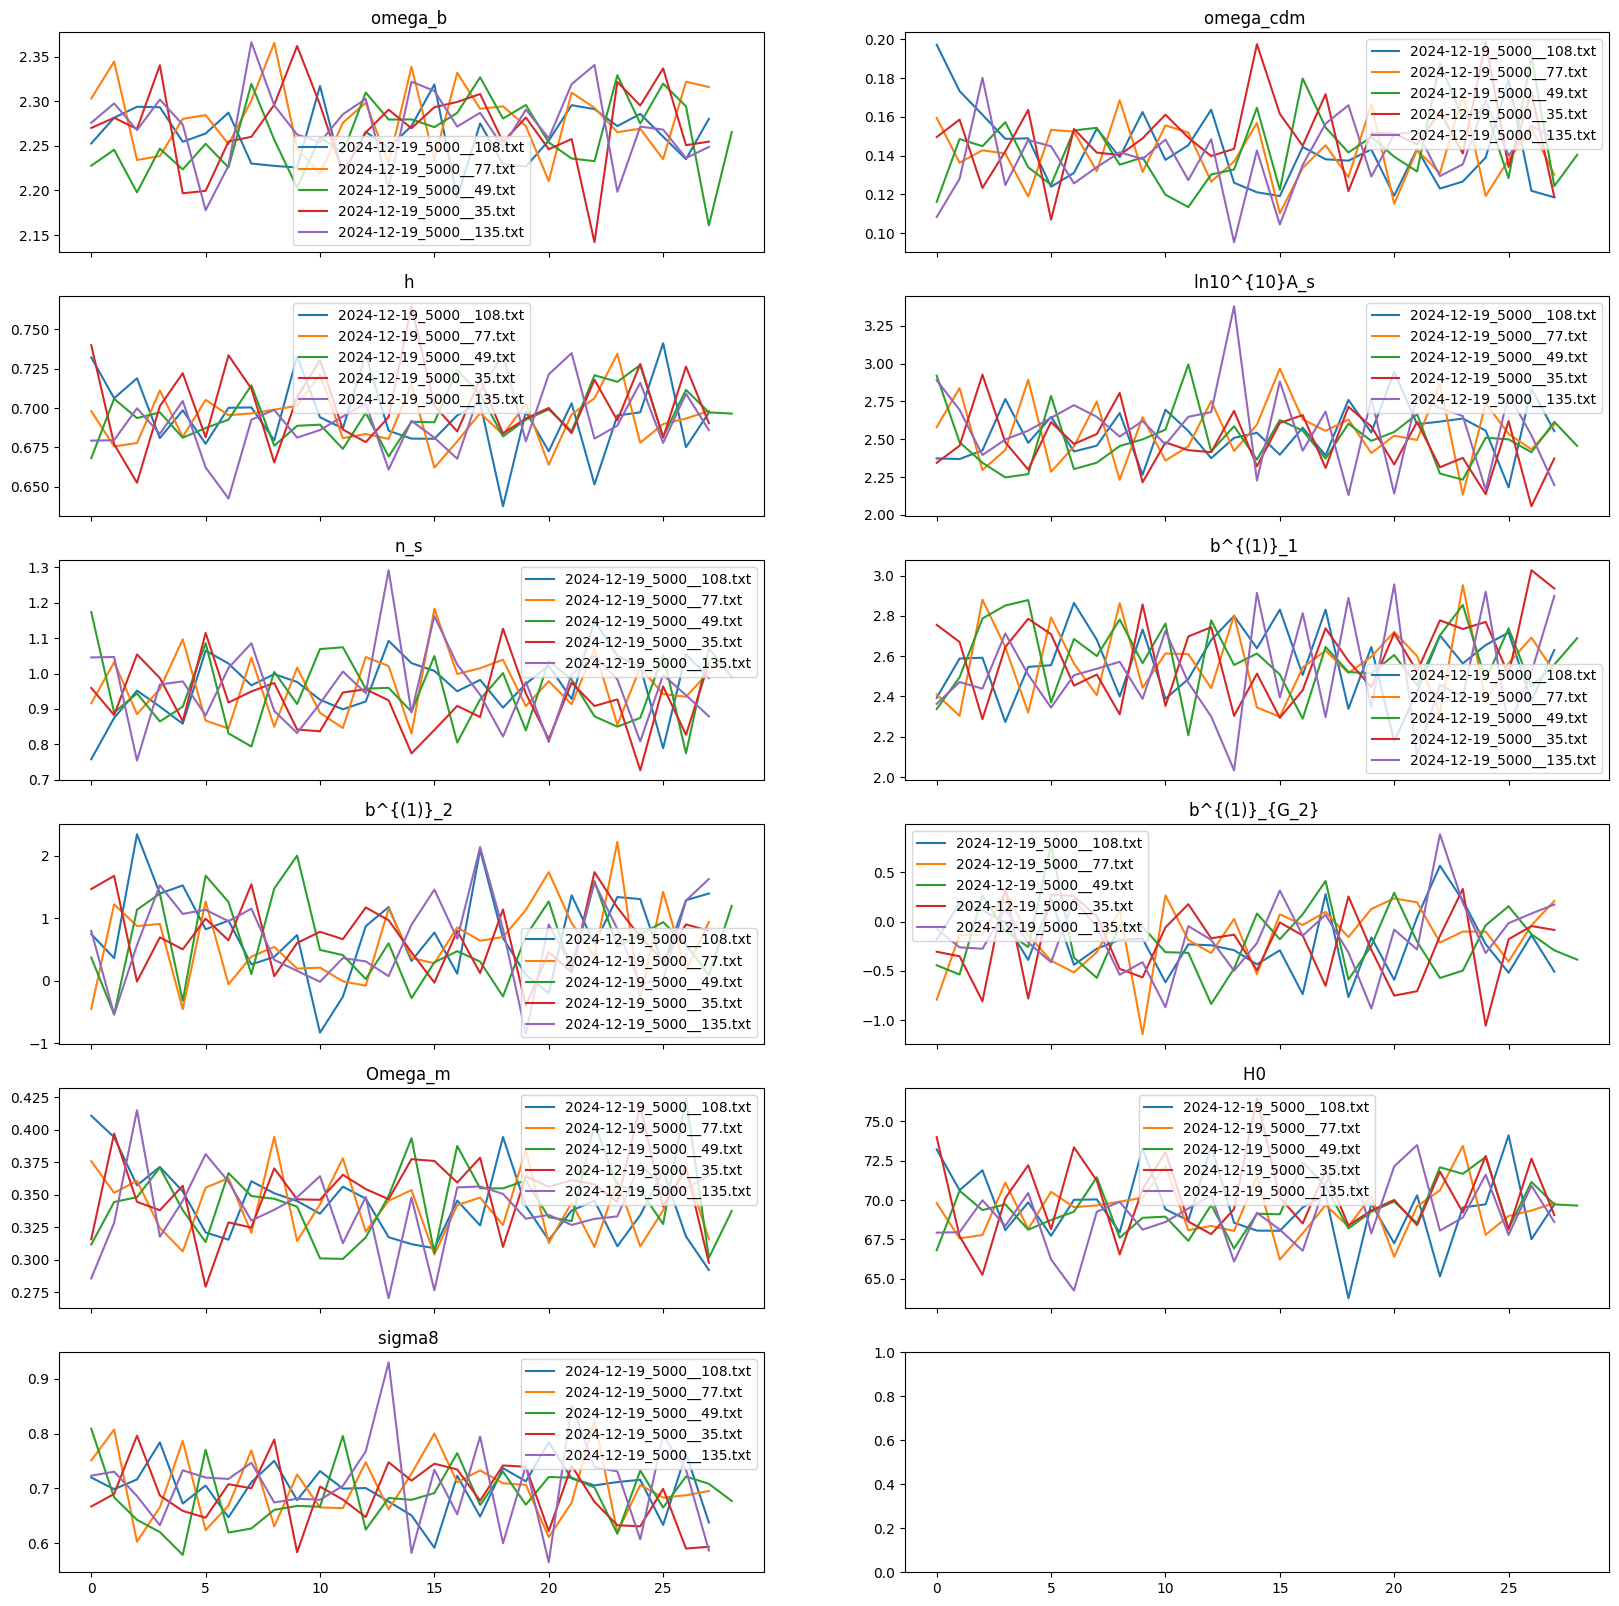

In [17]:
import matplotlib.pyplot as plt

# Select 5 random chains
random_chains = np.random.choice(samples['chain'].unique().tolist(), 5)

# Plot the trace for each chain
fig, axes = plt.subplots(len(names)//2+1, 2, figsize=(20, 20), sharex=True)
axes = axes.flatten()

for i, name in enumerate(names['name']):
    ax = axes[i]
    for chain in random_chains:
        chain_samples = samples[samples['chain'] == chain]
        ax.plot(chain_samples[name].values, label=chain)
    ax.set_title(name)
ax.legend()

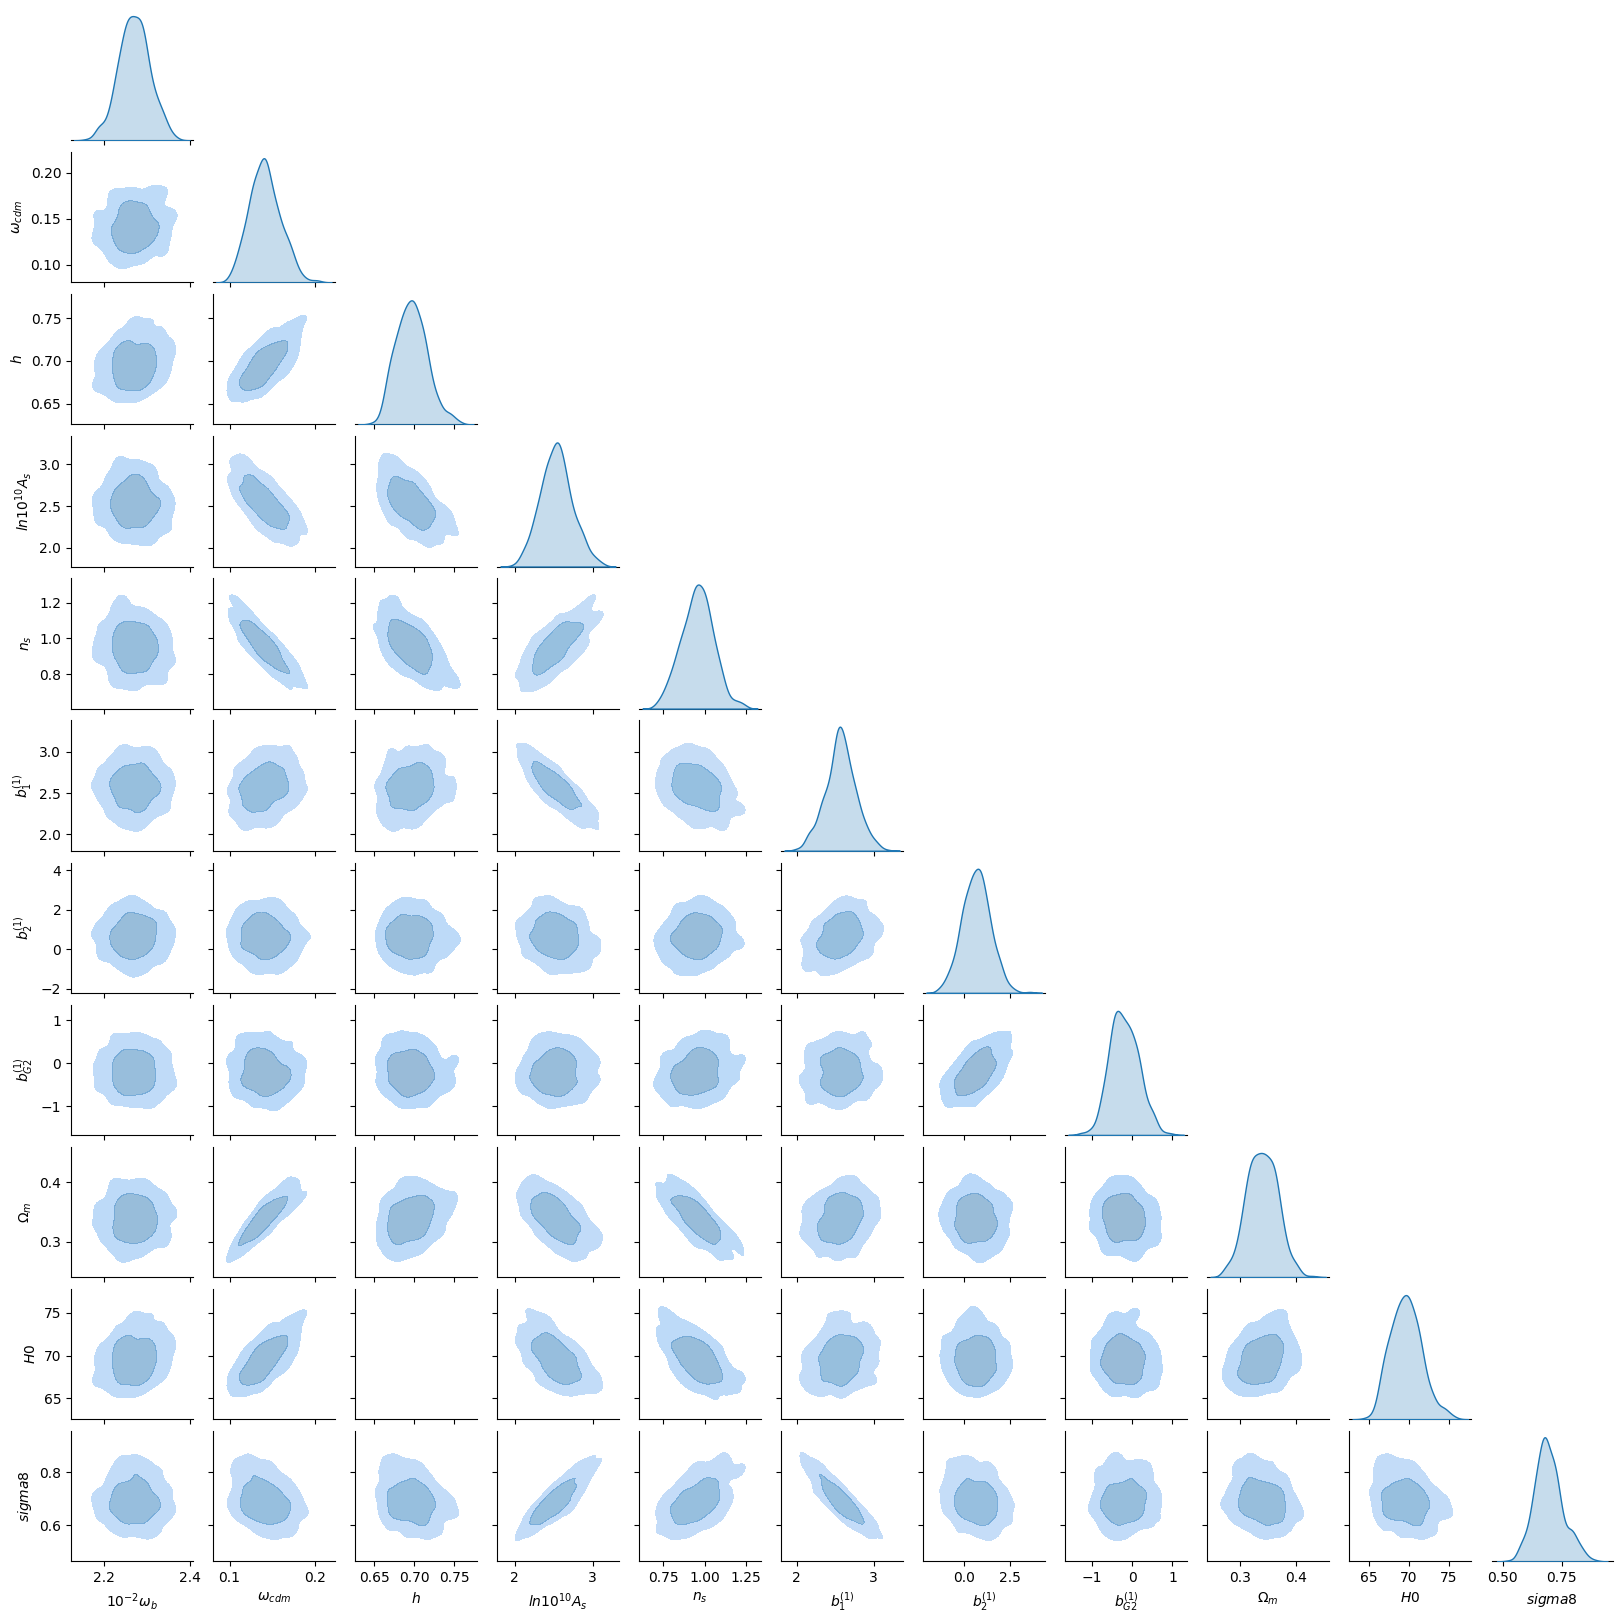

In [29]:
import seaborn as sns

samples_latex = samples.copy()
latex_names = [f'${x}$' for x in names['latex']]
samples_latex.columns = latex_names + ['chain']

# Create a pairplot of the samples with specified KDE levels and fill, using latex names as axis labels
sns.pairplot(
    samples_latex[::10],
    vars=latex_names,
    kind='kde',
    plot_kws={'alpha': 0.5, 'levels': [0.05, 0.36, 1], 'fill': True},
    corner=True,
    height=1.5  # Adjust the height to make the figure smaller
)

In [61]:
# Make them ltu-cmass-like
ltu_names = ['Omega_m', 'Omega_b', 'h', 'n_s', 'sigma8']
Omega_b = samples['omega_b ']/1e2
Omega_b /= samples['h ']**2
samples['Omega_b'] = Omega_b
ltu_samples = samples[['Omega_m ', 'Omega_b', 'h ', 'n_s ', 'sigma8 ', 'chain']]
ltu_samples.columns = ltu_names + ['chain']
ltu_samples.loc[:, 'chain'] = pd.factorize(ltu_samples['chain'])[0]

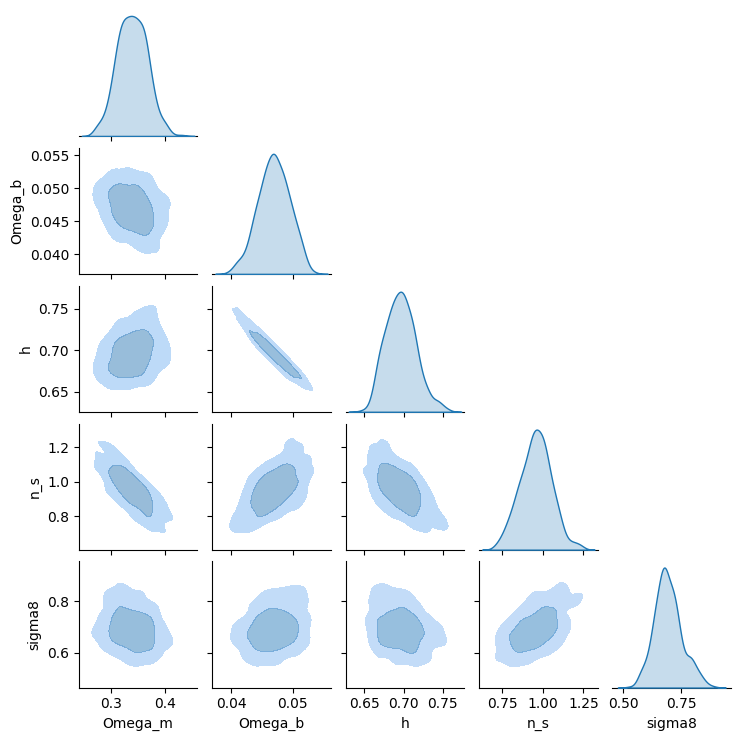

In [62]:
sns.pairplot(
    ltu_samples[::10],
    vars=ltu_names,
    kind='kde',
    plot_kws={'alpha': 0.5, 'levels': [0.05, 0.36, 1], 'fill': True},
    corner=True,
    height=1.5  # Adjust the height to make the figure smaller
)

In [63]:
# save the samples
outdir = '/anvil/scratch/x-mho1/cmass-ili/literature/processed'
outname = 'ivanov.csv'
ltu_samples.to_csv(join(outdir, outname), index=False)

## SIMBIG (from Paper)
https://www.nature.com/articles/s41550-024-02344-2

Directly extracted from Table 2


In [22]:
rawpath = '/anvil/scratch/x-mho1/cmass-ili/literature/simbig/NatureTable2.csv'
raw = pd.read_csv(rawpath).set_index('Parameter', drop=True)

In [23]:
raw

,$P_l(k<0.5)$ Value,$P_l(k<0.5)$ +,$P_l(k<0.5)$ -,$B_0(k_{123}<0.5)$ Value,$B_0(k_{123}<0.5)$ +,$B_0(k_{123}<0.5)$ -,$CNN$ Value,$CNN$ +,$CNN$ -
Parameter,,,,,,,,,
$\Omega_m$,0.287,0.059,0.038,0.297,0.020,0.035,0.295,0.036,0.033
$\sigma_8$,0.808,0.068,0.066,0.763,0.054,0.033,0.753,0.040,0.036
$\Omega_b$,0.044,0.009,0.006,0.050,0.003,0.002,0.046,0.003,0.003
$h$,0.713,0.056,0.059,0.676,0.018,0.018,0.702,0.024,0.022
$n_s$,0.935,0.070,0.073,0.952,0.035,0.040,1.039,0.053,0.044
$S_8$,0.797,0.107,0.093,0.757,0.048,0.053,0.746,0.055,0.051
$H_0$,71.255,5.615,5.921,67.556,1.801,1.843,70.199,2.387,2.208


In [24]:
raw = raw.iloc[[0, 2, 3, 4, 1]]  # reorder to match ltu_samples
arr = raw.values[:5, ...]
means = arr[:, ::3]
stds = (arr[:, 1::3] + arr[:, 2::3])/2

Nsamp = 2000
outdir = '/anvil/scratch/x-mho1/cmass-ili/literature/processed'
summs = ['pk', 'bk', 'cnn']
ltu_names = ['Omega_m', 'Omega_b', 'h', 'n_s', 'sigma8']
for i, summ in enumerate(summs):
    samps = means[:, i] + stds[:, i]*np.random.randn(Nsamp, 5)
    df = pd.DataFrame(samps, columns=ltu_names)
    outfile = join(outdir, f'simbig_{summ}.csv')
    print('saving to', outfile)
    df.to_csv(outfile, index=False)

saving to /anvil/scratch/x-mho1/cmass-ili/literature/processed/simbig_pk.csv
saving to /anvil/scratch/x-mho1/cmass-ili/literature/processed/simbig_bk.csv
saving to /anvil/scratch/x-mho1/cmass-ili/literature/processed/simbig_cnn.csv


In [20]:
means[:, i]

array([0.295, 0.753, 0.046, 0.702, 1.039])

## SIMBIG (from Chang)
Private Message on LtU Slack.

These are without BBN priors

In [2]:
indir = '/anvil/scratch/x-mho1/cmass-ili/literature/simbig'
outdir = '/anvil/scratch/x-mho1/cmass-ili/literature/processed'

### Power spectrum analysis

In [3]:
rawpath = join(indir, 'mc.simbig.cmass.plk.npy')
raw = np.load(rawpath)
names = [
    "Omega_m",
    "Omega_b",
    "h",
    "n_s",
    "sigma8",
    "log_M_min",
    "sigma_log_M",
    "log_M_0",
    "log_M_1",
    "alpha",
    "A_bias",
    "eta_conc",
    "eta_cen",
    "eta_sat",
    "A_shot"
]
df = pd.DataFrame(raw, columns=names)
df = df.iloc[:, :5]  # just get cosmo

In [50]:
outpath = join(outdir, 'simbig_pk.csv')
df.to_csv(outpath, index=False)

### Bispectrum analysis

In [4]:
rawpath = join(indir, 'mc.simbig.cmass.b0k_kmax0p5.npy')
raw = np.load(rawpath)
names = [
    "Omega_m",
    "Omega_b",
    "h",
    "n_s",
    "sigma8",
    "log_M_min",
    "sigma_log_M",
    "log_M_0",
    "log_M_1",
    "alpha",
    "A_bias",
    "eta_conc",
    "eta_cen",
    "eta_sat",
    # "A_shot"
]
df = pd.DataFrame(raw, columns=names)
df = df.iloc[:, :5]  # just get cosmo

In [12]:
for n in names[:5]:
    print(f'{n}:      \t{df[n].mean():.4f} +/- {df[n].std():.4f}')

Omega_m:      	0.2939 +/- 0.0277
Omega_b:      	0.0586 +/- 0.0049
h:      	0.7563 +/- 0.0398
n_s:      	0.9520 +/- 0.0383
sigma8:      	0.7840 +/- 0.0399


In [53]:
outpath = join(outdir, 'simbig_bk.csv')
df.to_csv(outpath, index=False)

### CNN analysis

In [54]:
rawpath = join(indir, 'mc.simbig.cmass.cnn_cic_off2_wd005_swa2.txt')
raw = np.loadtxt(rawpath)
names = [
    "idk",
    "something",
    "Omega_m",
    "Omega_b",
    "h",
    "n_s",
    "sigma8",
    "unknown",
    "else",
    "not sure",
    "what"
]
df = pd.DataFrame(raw, columns=names)
df = df.iloc[:, 2:7]  # just get cosmo

In [55]:
outpath = join(outdir, 'simbig_cnn.csv')
df.to_csv(outpath, index=False)

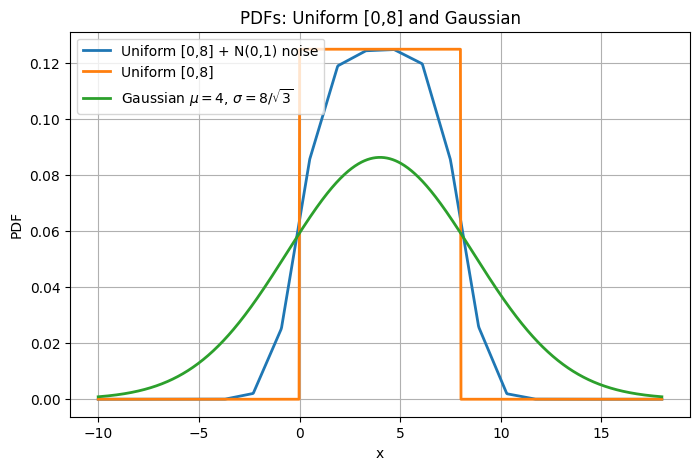

In [26]:
from scipy.stats import gaussian_kde

x = np.linspace(-10, 18, 1000)
uniform_pdf = np.where((x >= 0) & (x <= 8), 1/8, 0)
gaussian_pdf = (1/(np.sqrt(2*np.pi)*(8/np.sqrt(3)))) * \
    np.exp(-0.5 * ((x-4)/(8/np.sqrt(3)))**2)
np.random.seed(0)
uniform_samples = np.random.uniform(0, 8, 100000)
noisy_uniform_samples = uniform_samples + \
    np.random.normal(0, 1, len(uniform_samples))
hist_vals, bin_edges = np.histogram(
    noisy_uniform_samples, bins=20, range=(x.min(), x.max()), density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
noisy_uniform_pdf = np.interp(x, bin_centers, hist_vals, left=0, right=0)

plt.figure(figsize=(8, 5))
plt.plot(x, noisy_uniform_pdf, label='Uniform [0,8] + N(0,1) noise', lw=2)
plt.plot(x, uniform_pdf, label='Uniform [0,8]', lw=2)
plt.plot(x, gaussian_pdf, label='Gaussian $\mu=4$, $\sigma=8/\sqrt{3}$', lw=2)
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.title('PDFs: Uniform [0,8] and Gaussian')
plt.grid(True)
plt.show()